In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [2]:
df = pd.read_csv('hotel_booking.csv')

In [3]:
pd.set_option('display.max_columns',50)

In [4]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
3420,Resort Hotel,1,44,2015,December,49,5,2,1,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,134.0,NaN,0,Transient-Party,70.0,0,0,Canceled,2015-11-30,Brett Allen,Brett.Allen@zoho.com,780-676-8811,************7756
7985,Resort Hotel,0,305,2016,September,37,6,2,8,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,40.0,NaN,0,Transient,62.9,0,0,Check-Out,2016-09-16,Annette Lopez,Annette_L@gmail.com,618-376-5937,************5729
1871,Resort Hotel,0,4,2015,September,38,19,1,1,1,0.0,0,HB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,248.0,NaN,0,Transient-Party,59.0,0,0,Check-Out,2015-09-21,Phillip Rodriguez,Rodriguez.Phillip@zoho.com,770-576-9587,************5564
53977,City Hotel,1,149,2016,July,28,4,1,1,2,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,114.3,0,1,Canceled,2016-06-15,Kenneth Wu,KWu@outlook.com,433-804-2182,************2343
22156,Resort Hotel,0,38,2016,March,11,12,2,5,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,115.0,NaN,0,Transient,49.5,0,0,Check-Out,2016-03-19,Diamond Smith,Diamond_S@verizon.com,990-732-2232,************1481


In [5]:
df.shape

(119390, 36)

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
country_mode = df['country'].mode()

In [8]:
df['country'].fillna(country_mode[0],inplace = True)

C:\Users\gaura\AppData\Local\Temp\ipykernel_28252\3670583282.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(country_mode[0],inplace = True)


In [9]:
df.drop(columns = ['agent','company'],inplace = True)

In [10]:
df['children'].fillna(0,inplace = True)

C:\Users\gaura\AppData\Local\Temp\ipykernel_28252\434808794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0,inplace = True)


In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


# Exploratory Data Analysis (EDA)

In [13]:
df_reserved = df[df['is_canceled'] == 0]

## "Monthly Guest Count: Tracking the Number of Guests Each Month"

In [14]:
df['month_number'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month #Add new column 'month_number'

In [15]:
city_hotel = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)] # Seperate 'City Hotels'

In [16]:
resort_hotel = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)] # Seperate 'Resort Hotels'

In [17]:
city_hotel_month_booking = city_hotel.groupby(['arrival_date_month','month_number'],as_index = False)[['arrival_date_day_of_month']].count().rename(columns = {'arrival_date_month' : 'month_name',"arrival_date_day_of_month":'total_booking'}).sort_values(['month_number']).reset_index(drop = True)

In [18]:
resort_hotel_month_booking = resort_hotel.groupby(['arrival_date_month','month_number'],as_index = False)[['arrival_date_day_of_month']].count().rename(columns = {'arrival_date_month' : 'month_name',"arrival_date_day_of_month":'total_booking'}).sort_values(['month_number']).reset_index(drop = True)

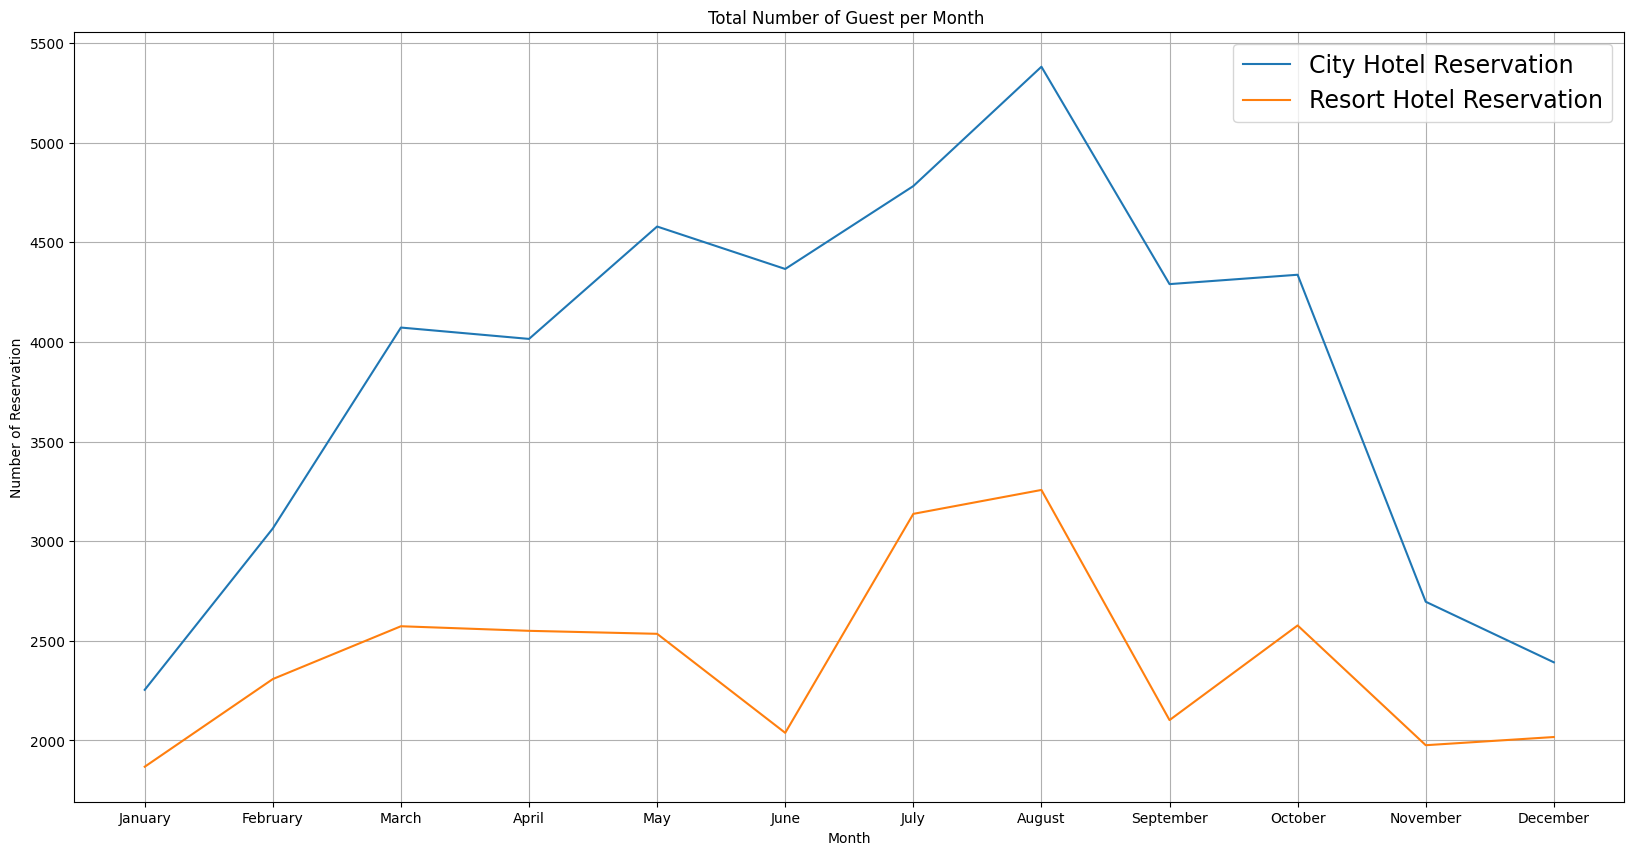

In [19]:
plt.figure(figsize = (20,10))
plt.plot(city_hotel_month_booking['month_name'],city_hotel_month_booking['total_booking'],label = 'City Hotel Reservation')
plt.plot(resort_hotel_month_booking['month_name'],resort_hotel_month_booking['total_booking'],label = 'Resort Hotel Reservation')
plt.title('Total Number of Guest per Month ')
plt.legend(fontsize = 17)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Number of Reservation')
plt.show()

- **The graph highlights August as the peak booking month for both city and resort hotels**
- **As winter approaches after October, bookings decline, reflecting seasonal changes in travel preferences and demand.**
- **Taking advantage of the hot summer period can optimize business performance and revenue generation for hotels.**

In [20]:
city_hotel_adr = city_hotel.groupby(['arrival_date_month','month_number'],as_index = False)[['adr']].mean().rename(columns = {'arrival_date_month':'month_name'}).sort_values(['month_number'])

In [21]:
resort_hotel_adr = resort_hotel.groupby(['arrival_date_month','month_number'],as_index = False)[['adr']].mean().rename(columns = {'arrival_date_month':'month_name'}).sort_values(['month_number'])

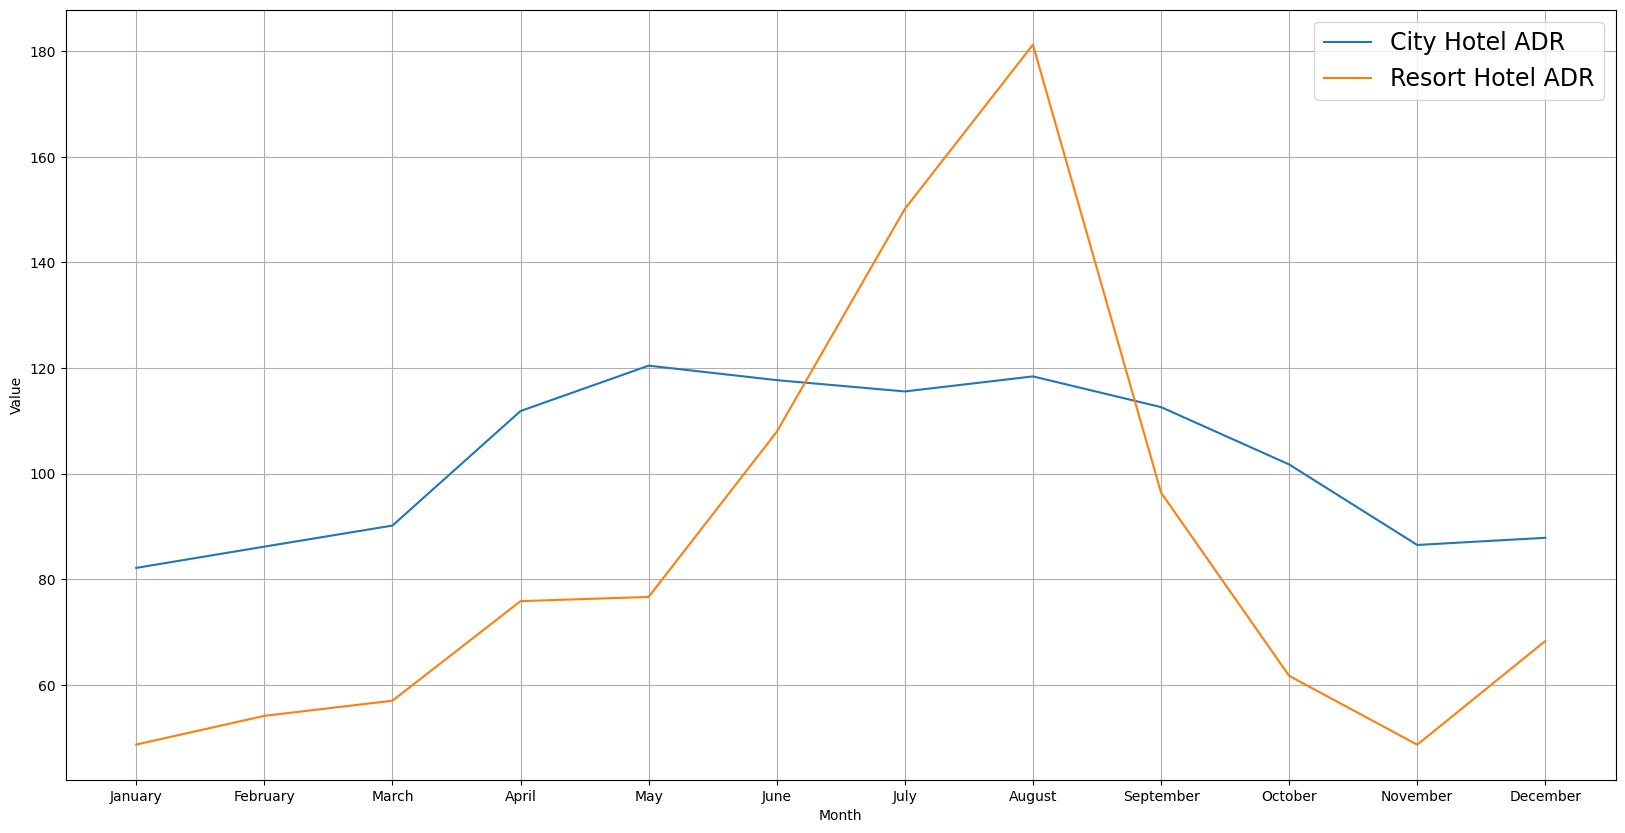

In [22]:
plt.figure(figsize = (20,10))
plt.plot(city_hotel_adr['month_name'],city_hotel_adr['adr'],label = 'City Hotel ADR')
plt.plot(resort_hotel_adr['month_name'],resort_hotel_adr['adr'],label = 'Resort Hotel ADR')
plt.legend(fontsize = 17)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Value')
plt.show()

**The average daily rate (ADR) is so high during summer time. Due to high demand in summer season.**


## Market Segment

In [23]:
market_segment_city_hotel = city_hotel.groupby('market_segment',as_index = False)[['hotel']].count().rename(columns = {'hotel':"reserved"}).sort_values(['reserved'],ascending = False).reset_index(drop=True)

In [24]:
market_segment_resort_hotel = resort_hotel.groupby('market_segment',as_index = False)[['hotel']].count().rename(columns = {'hotel':"reserved"}).sort_values(['reserved'],ascending = False).reset_index(drop=True)

In [25]:
market_segment_city_hotel

,market_segment,reserved
0,Online TA,24257
1,Offline TA/TO,9574
2,Direct,5037
3,Groups,4352
4,Corporate,2345
5,Complementary,478
6,Aviation,185


## Monthly Average Daily Rates (adr)

In [26]:
market_segment_resort_hotel

,market_segment,reserved
0,Online TA,11481
1,Offline TA/TO,6334
2,Direct,5635
3,Groups,3362
4,Corporate,1958
5,Complementary,168


**The online travel agency is very helpful for reservations at both hotels. And we also got the highest number of bookings for it.**

## Repeated Guest Percentage

In [27]:
repeated_percent = round(df[df['is_canceled'] == 0]['is_repeated_guest'].value_counts(normalize = True) *100,2)

In [28]:
print(f'New Guests :- {repeated_percent[0]}%')
print(f'Repeated Guests :- {repeated_percent[1]}%')

New Guests :- 95.67%
Repeated Guests :- 4.33%


**As we see, only 4.3% of our guests are repeat guests**


## Most Reserved Room Type

In [29]:
room_type_percent = df['reserved_room_type'].value_counts(normalize = True)*100

In [30]:
room_type_percent = pd.DataFrame(room_type_percent).reset_index()

In [31]:
room_type_percent.rename(columns = {'index':'room_type','reserved_room_type':'booking_share'},inplace = True)

In [32]:
adr_room_type = df.groupby('reserved_room_type',as_index = False)[['adr']].mean()

In [33]:
room_type_percent = pd.merge(room_type_percent,adr_room_type,'left',left_on = 'room_type',right_on = 'reserved_room_type')

KeyError: 'room_type'

In [ ]:
room_type_percent = room_type_percent[['room_type','booking_share','adr']]

In [ ]:
room_type_percent

,room_type,booking_share,adr
0,A,72.027808,90.796658
1,D,16.082586,120.682882
2,E,5.473658,124.540179
3,F,2.426501,167.689651
4,G,1.753916,175.996027
5,B,0.936427,90.360447
6,C,0.780635,160.216792
7,H,0.503392,188.223111
8,P,0.010051,0.000000
9,L,0.005026,124.666667


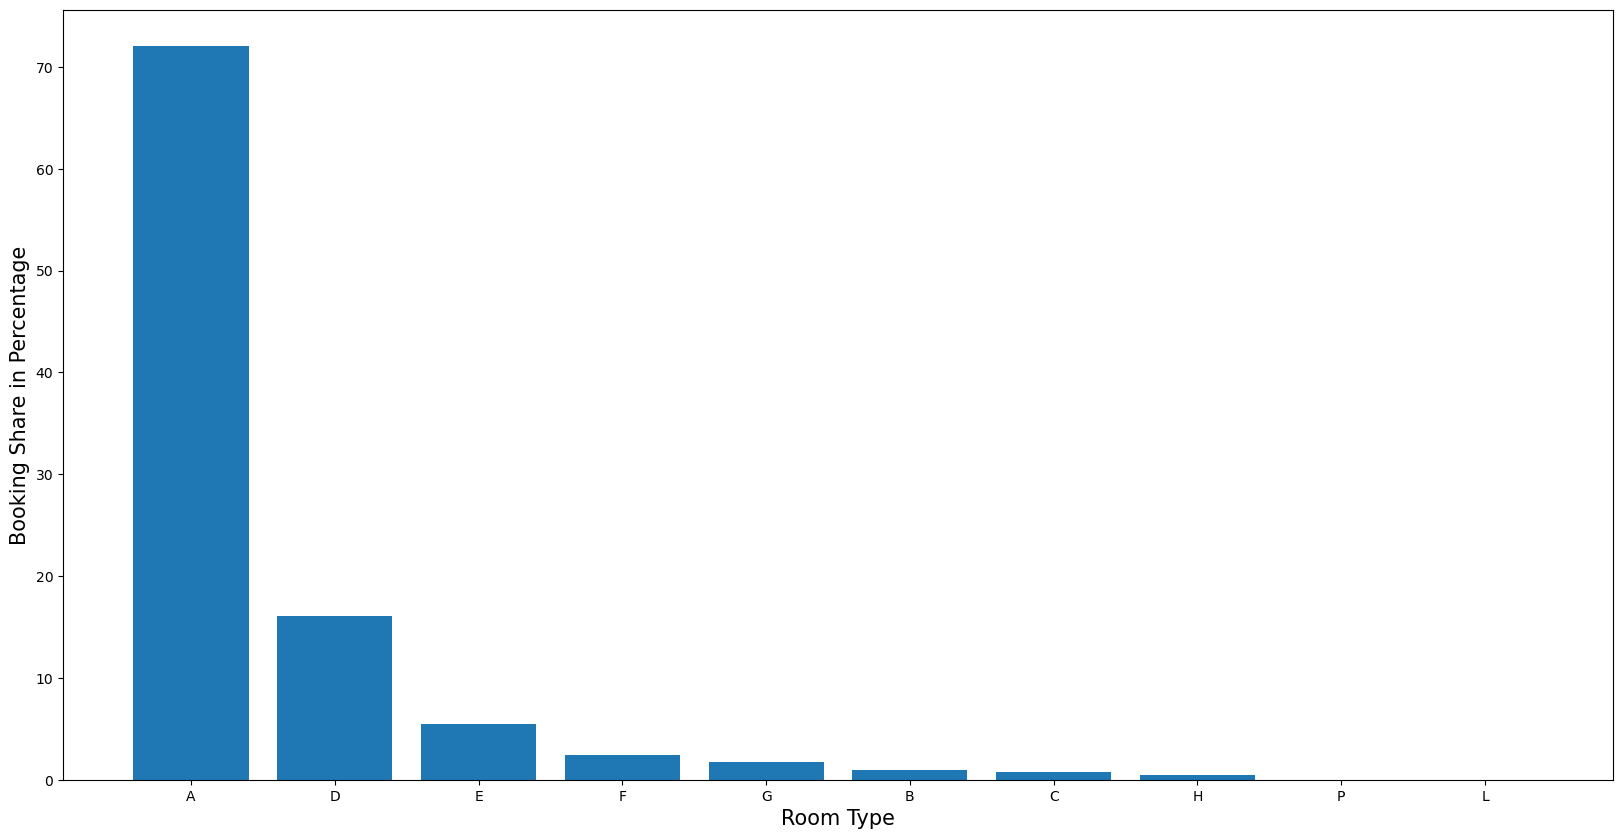

In [ ]:
plt.figure(figsize = (20,10))
plt.bar(room_type_percent['room_type'],room_type_percent['booking_share'])
plt.xlabel('Room Type',fontsize = 15)
plt.ylabel('Booking Share in Percentage',fontsize = 15)
plt.show()

**Demand for 'A' type rooms is high in our hotels**

## Customer Type

In [41]:
customer_type = round(df_reserved['customer_type'].value_counts(normalize = True)*100,2)

In [42]:
customer_type = pd.DataFrame(customer_type).reset_index()

In [43]:
customer_type

,customer_type,proportion
0,Transient,70.64
1,Transient-Party,24.92
2,Contract,3.74
3,Group,0.69


In [44]:
customer_type.rename(columns = {'proportion':'percentage'},inplace = True)

In [45]:
customer_type

,customer_type,percentage
0,Transient,70.64
1,Transient-Party,24.92
2,Contract,3.74
3,Group,0.69


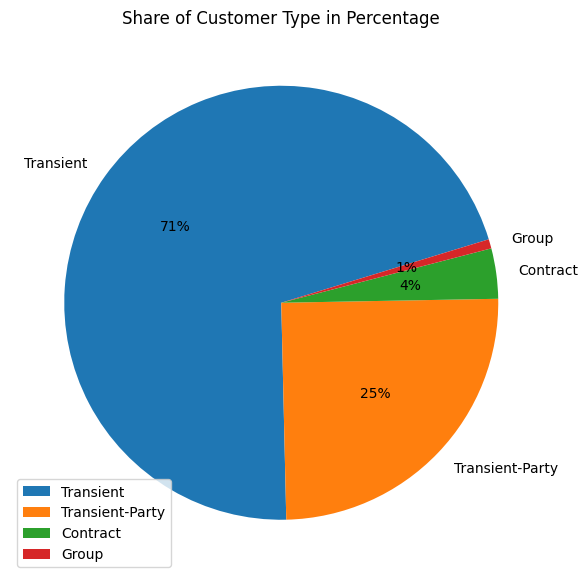

In [46]:
plt.figure(figsize = (7,10))
plt.pie(customer_type['percentage'],labels = customer_type['customer_type'],startangle = 17,autopct = '%1.f%%')
plt.title('Share of Customer Type in Percentage')
plt.legend()
plt.show()

## Car Parking Space

In [47]:
car_parking_space = df[['required_car_parking_spaces']].value_counts()

In [48]:
car_parking_space

required_car_parking_spaces
0                              111974
1                                7383
2                                  28
3                                   3
8                                   2
Name: count, dtype: int64

## Reservation Possiblities Percentage

In [53]:
reservation_percent = pd.DataFrame(round(df['is_canceled'].value_counts(normalize = True) * 100,2)).reset_index()

In [54]:
reservation_percent

,is_canceled,proportion
0,0,62.96
1,1,37.04


In [55]:
print(f'No Cancellation :- {reservation_percent.iloc[0]}')
print(f'Cancellation :- {reservation_percent.iloc[1]}')

No Cancellation :- is_canceled     0.00
proportion     62.96
Name: 0, dtype: float64
Cancellation :- is_canceled     1.00
proportion     37.04
Name: 1, dtype: float64


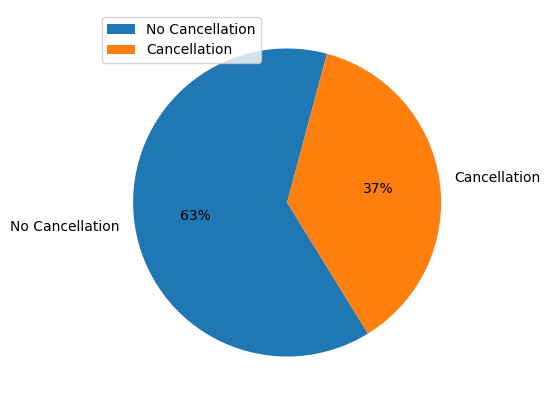

In [56]:
plt.figure(figsize = (10,5))
plt.pie(reservation_percent['proportion'],autopct = '%1.f%%',startangle = 75,labels = ['No Cancellation','Cancellation'])
plt.legend()
plt.show()

**In the above graph we easily seen that our cancellation rate is too high approx 37%**
    

In [57]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,month_number
51835,City Hotel,0,316,2016,May,22,26,0,3,2,0.0,0,BB,AUT,Groups,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient-Party,110.00,0,0,Check-Out,2016-05-29,Sabrina Sparks,Sparks_Sabrina@xfinity.com,555-656-9304,************1519,5
5550,Resort Hotel,0,199,2016,May,19,2,1,1,2,0.0,0,HB,DEU,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,85.00,0,0,Check-Out,2016-05-04,Sharon Montoya,Sharon_M@hotmail.com,393-480-9900,************5444,5
37767,Resort Hotel,0,325,2017,June,25,23,2,4,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,0,Transient,85.21,0,1,Check-Out,2017-06-29,Angel Stanley,AStanley@hotmail.com,790-193-5644,************4560,6
67794,City Hotel,1,88,2017,May,19,7,2,2,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,89.10,0,0,Canceled,2017-02-08,Diane Horne,Diane_H@att.com,230-886-5419,************9009,5
113639,City Hotel,0,48,2017,June,23,6,0,4,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,150.00,0,1,Check-Out,2017-06-10,Melissa Strong,Melissa.S@yahoo.com,473-343-2175,************1685,6


In [59]:
df['deposit_type'].value_counts()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

In [60]:
# chart

df['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

In [62]:
df.groupby('arrival_date_month',as_index = False)[['adr']].agg("count")

,arrival_date_month,adr
0,April,11089
1,August,13877
2,December,6780
3,February,8068
4,January,5929
5,July,12661
6,June,10939
7,March,9794
8,May,11791
9,November,6794


In [63]:
def new_group_func(data,group_col,**kwargs):
    data = data.groupby(group_col,as_index = True).agg(kwargs)
    for i,j in kwargs.items():
        data.rename(columns = {i:j},inplace = True)
    return data

In [64]:
new_group_func(df,['arrival_date_month','month_number'],customer_type = "count",adr = "sum")

,,count,sum
arrival_date_month,month_number,,
April,4,11089,1113122.58
August,8,13877,1944327.60
December,12,6780,549700.54
February,2,8068,593661.80
January,1,5929,417171.80
July,7,12661,1605263.03
June,6,10939,1276277.11
March,3,9794,790176.45
May,5,11791,1281628.83
